In [2]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Function that computes percentiles of average template intensities in selected
#structures.
def get_median_template_intensity(mouse_connectivity_cache, structure_ids):
    
    mask = mouse_connectivity_cache.get_reference_space().make_structure_mask(structure_ids)
    template, _ = mouse_connectivity_cache.get_template_volume()
                        
    return np.percentile(template[mask > 0].flat, 50, interpolation='lower')

In [4]:
def axis_proj(data, template, axis, bg_q=90, bg_alpha=0.5):
    
    data_max = np.amax(data, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)
    
    plt.imshow(data_max, interpolation='none', cmap=plt.cm.afmhot)
    plt.imshow(template_bg, interpolation='none', cmap=plt.cm.gray, alpha=0.5)
    plt.axis('off')  # Hide x and y axes

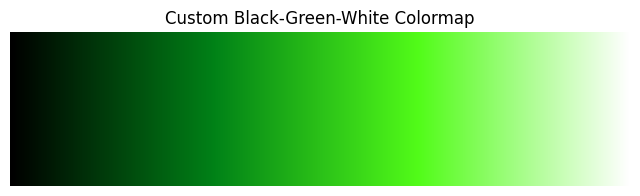

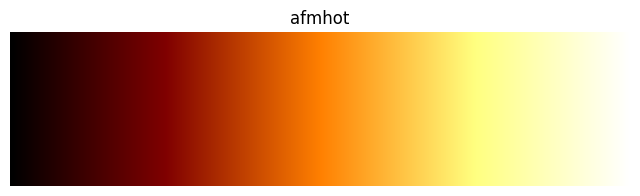

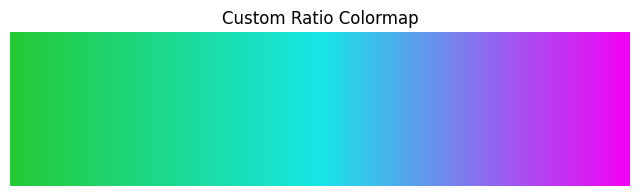

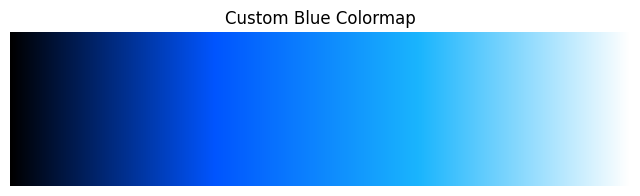

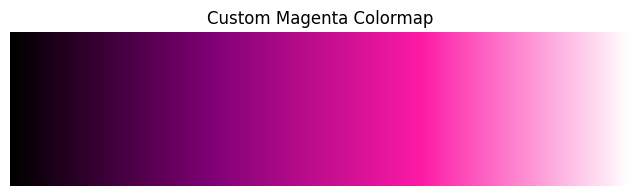

In [35]:
# Define custom colormap: black -> green -> white
green_palette = [(0.00, "#000000"),
                (0.33, "#018217"),
                (0.66, "#52FC19"),
                (1.00, "#FFFFFF")
               ]

blue_palette = [(0.00, "#000000"),
                (0.33, "#0055FF"),
                (0.66, "#1AB5FD"),
                (1.00, "#FFFFFF")
               ]

magenta_palette = [(0.00, "#000000"),
                   (0.33, "#820177"),
                   (0.66, "#FC19A5"),
                   (1.00, "#FFFFFF")
                  ]


#colors_ratio = [
#    (0.0, "black"),    # Values ≤ 0 → Black
#    (0.25, "black"),   # Near 0 but still black
#    (0.35, "green"),   # 0 → Green transition starts
#    (0.75, "white"),   # 1 → White
#    (1.0, "magenta")   # >1 → Magenta
#]

colors_ratio =[(0.00, "#24CB35"),
               (0.50, "#16E7E7"),
               (1.00, "#F500F5")    # 100% → Magenta (hsla(305, 99%, 50%, 1))
]

# Create colormap
custom_green_cmap = mcolors.LinearSegmentedColormap.from_list("custom_green_cmap", green_palette)
custom_blue_cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue_cmap", blue_palette)
custom_magenta_cmap = mcolors.LinearSegmentedColormap.from_list("custom_magenta_cmap", magenta_palette)
custom_cmap_ratio = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_ratio)

# Show colormap example
gradient = np.linspace(0, 1, 256).reshape(1, -1)  # Create a gradient for visualization
plt.figure(figsize=(8, 2))
plt.imshow(gradient, aspect='auto', cmap=custom_green_cmap)
plt.axis('off')
plt.title("Custom Black-Green-White Colormap")
plt.show()

gradient = np.linspace(0, 1, 256).reshape(1, -1)  # Create a gradient for visualization
plt.figure(figsize=(8, 2))
plt.imshow(gradient, aspect='auto', cmap=plt.cm.afmhot)
plt.axis('off')
plt.title("afmhot")
plt.show()

gradient = np.linspace(0, 1, 256).reshape(1, -1)  # Create a gradient for visualization
plt.figure(figsize=(8, 2))
plt.imshow(gradient, aspect='auto', cmap=custom_cmap_ratio)
plt.axis('off')
plt.title("Custom Ratio Colormap")
plt.show()

gradient = np.linspace(0, 1, 256).reshape(1, -1)  # Create a gradient for visualization
plt.figure(figsize=(8, 2))
plt.imshow(gradient, aspect='auto', cmap=custom_blue_cmap)
plt.axis('off')
plt.title("Custom Blue Colormap")
plt.show()

gradient = np.linspace(0, 1, 256).reshape(1, -1)  # Create a gradient for visualization
plt.figure(figsize=(8, 2))
plt.imshow(gradient, aspect='auto', cmap=custom_magenta_cmap)
plt.axis('off')
plt.title("Custom Magenta Colormap")
plt.show()

In [6]:
def axis_proj_green(data, template, axis, bg_q=90, bg_alpha=0.5):
    """
    To plot the density projections with the green colorbar
    """
    
    data_max = np.amax(data, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)
    
    plt.imshow(data_max, interpolation='none', cmap=custom_green_cmap)
    plt.imshow(template_bg, interpolation='none', cmap=plt.cm.gray, alpha=0.5)
    plt.axis('off')  # Hide x and y axes

In [7]:
def axis_proj_blue(data, template, axis, bg_q=90, bg_alpha=0.5):
    """
    To plot the density projections with the green colorbar
    """
    
    data_max = np.amax(data, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)
    
    plt.imshow(data_max, interpolation='none', cmap=custom_blue_cmap)
    plt.imshow(template_bg, interpolation='none', cmap=plt.cm.gray, alpha=0.5)
    plt.axis('off')  # Hide x and y axes

In [8]:
def axis_proj_magenta(data, template, axis, bg_q=90, bg_alpha=0.5):
    """
    To plot the density projections with the green colorbar
    """
    
    data_max = np.amax(data, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)
    
    plt.imshow(data_max, interpolation='none', cmap=custom_magenta_cmap)
    plt.imshow(template_bg, interpolation='none', cmap=plt.cm.gray, alpha=0.5)
    plt.axis('off')  # Hide x and y axes

In [9]:
def sign_preserving_projection(data, axis):
    """
    For each (x,y) in the projected plane, select the element along the given axis
    with the largest absolute value, and return that value.
    """
    abs_data = np.abs(data)
    idx = np.argmax(abs_data, axis=axis)
    
    # Use np.take_along_axis to retrieve the values along the specified axis
    proj = np.take_along_axis(data, np.expand_dims(idx, axis=axis), axis=axis)
    # Remove the extra axis
    proj = np.squeeze(proj, axis=axis)
    return proj


In [10]:
def slice_hsv_overlay(selectivity_index, sum_matrix, template, slice_index, axis=1, ax=None, bg_q=90, bg_alpha=1, structure_masks=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Select the appropriate 2D slice
    if axis == 0:
        si_slice = selectivity_index[slice_index, :, :]
        sm_slice = sum_matrix[slice_index, :, :]
        bg_slice = template[slice_index, :, :]
    elif axis == 1:
        si_slice = selectivity_index[:, slice_index, :]
        sm_slice = sum_matrix[:, slice_index, :]
        bg_slice = template[:, slice_index, :]
    elif axis == 2:
        si_slice = selectivity_index[:, :, slice_index]
        sm_slice = sum_matrix[:, :, slice_index]
        bg_slice = template[:, :, slice_index]
    else:
        raise ValueError("Axis must be 0, 1, or 2")

    # Normalize and convert HSV to RGB
    sm_norm = np.full_like(sm_slice, np.nan, dtype=np.float32)
    non_zero_mask = sm_slice > 0
    if np.any(non_zero_mask):
        sm_norm[non_zero_mask] = sm_slice[non_zero_mask] / np.nanmax(sm_slice[non_zero_mask])
    else:
        sm_norm[:] = 0

    #hue = np.where(si_slice >= 0, 1/3, 5/6)  # Green or Magenta
    # Map from [-1, 1] → [1/3, 0.75] (green to cyan to magenta)
    si_clipped = np.clip(si_slice, -1, 1)
    hue = (1 - (si_clipped + 1) / 2) * (5/6 - 1/3) + 1/3
    #hue = np.full_like(si_slice, 0.5)  # default to light blue (approx. 0.5 in HSV)
    #hue[si_slice <= -0.25] = 5/6       # green (~0.33)
    #hue[si_slice >= 0.25] = 1/3        # magenta (~0.83)
    #saturation = np.abs(si_slice)      # to have saturation variable in the map
    saturation = np.ones_like(si_slice)
    #value = sm_norm
    value = np.ones_like(saturation)

    alpha_channel = sm_norm
    alpha_channel[~non_zero_mask] = 0
    
    hsv_image = np.stack((hue, saturation, value), axis=-1)
    rgb_image = hsv_to_rgb(hsv_image)
    # Combine RGB and alpha to create an RGBA image
    rgba_image = np.dstack((rgb_image, alpha_channel))

    #alpha = np.abs(si_slice)
    #alpha[~non_zero_mask] = 0

    # Plot anatomical background
    ax.imshow(bg_slice, cmap='gray', alpha=bg_alpha, interpolation='none')

    # Plot HSV overlay
    ax.imshow(rgba_image, interpolation='none')

    # Overlay the structure mask (e.g., MOs)
    if structure_masks is not None:
        for region_name, (mask, color) in structure_masks.items():
            # Extract slice for the current axis
            if axis == 0:
                mask_slice = mask[slice_index, :, :]
            elif axis == 1:
                mask_slice = mask[:, slice_index, :]
            elif axis == 2:
                mask_slice = mask[:, :, slice_index]
            else:
                raise ValueError("Invalid axis. Use 0, 1, or 2.")
            # Plot contour if the mask slice has nonzero data
            if np.any(mask_slice):
                ax.contour(mask_slice, levels=[0.5], colors=color, linewidths=0.2)
    
    ax.axis('off')

In [11]:
from matplotlib.colors import hsv_to_rgb, Normalize
import numpy as np
import matplotlib.pyplot as plt

#Projection function
##Value is brightness of pixel
def axis_proj_hsv_brightness(selectivity_index, sum_matrix, template, axis, bg_q=90, bg_alpha=1):
    """
    Visualize selectivity index with HSV-based colormap and anatomical overlay.

    Parameters:
    - selectivity_index: 3D numpy array (values between -1 and 1)
    - sum_matrix: 3D numpy array (values to control saturation)
    - template: 3D numpy array for anatomical reference
    - axis: Axis to perform the maximum projection
    - bg_q: Percentile for background intensity
    - bg_alpha: Transparency for the background
    """
    # Replace NaNs in the inputs
    selectivity_index = np.nan_to_num(selectivity_index)
    sum_matrix = np.nan_to_num(sum_matrix)

    # Compute maximum projections along the specified axis
    #selectivity_max = np.nanmean(selectivity_index, axis=axis)
    #Alternative: to highlight the most dominant (extreme) signal and preserving clear boundaries between positive and negative contributions
    selectivity_max = sign_preserving_projection(selectivity_index, axis=axis)

    
    sum_max = np.nanmax(sum_matrix, axis=axis)
    sel_i_max =np.nanmax(selectivity_index, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)
    
    
    #Normalize the sum matrix for value: scale active pixels (sum_max > 0) to [0, 1]
    sum_max_norm = np.full_like(sum_max, np.nan, dtype=np.float32)
    non_zero_mask = sum_max > 0
    if np.any(non_zero_mask):
        sum_max_norm[non_zero_mask] = sum_max[non_zero_mask] / np.nanmax(sum_max[non_zero_mask])
    else:
        sum_max_norm[:] = 0  # If no nonzero, set to zero

    # HSV Mapping
    # Hue: Green (positive) and Magenta (negative)
    hue = np.where(selectivity_max >= 0, 1/3, 5/6)  # 1/3 = Green, 5/6 = Magenta

    # Saturation: Based on selectivity index (magnitude)
    saturation = np.abs(selectivity_max)  # Values close to 0 = bright, |1| = dark

    # Value: Darker for lower magnitude of selectivity index (brightness)
    value = sum_max_norm

    # Combine HSV channels and convert to RGB
    hsv_image = np.stack((hue, saturation, value), axis=-1)
    data_rgb = hsv_to_rgb(hsv_image)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Overlay anatomical background
    ax.imshow(template_bg, cmap='gray', alpha=bg_alpha, interpolation='none')
    
    # Then overlay the projection data
    ax.imshow(data_rgb, interpolation='none')
    
    # --- Create colorbars for each channel ---
    # 1. Hue: Represents selectivity index (-1 to 1)
    vmin_hue = np.nanmin(selectivity_max)
    vmax_hue = np.nanmax(selectivity_max)
    norm_hue = Normalize(vmin=vmin_hue, vmax=vmax_hue)
    cbar_hue = plt.colorbar(plt.cm.ScalarMappable(norm=norm_hue, cmap=custom_cmap_ratio),
                             ax=ax, orientation="vertical", fraction=0.05, pad=0.02)
    cbar_hue.set_label("Selectivity Index (Hue)", fontsize=10)
    
    # 2. Saturation: Represents the normalized sum matrix intensity (0 to 1)
    vmin_sat = np.nanmin(selectivity_max)
    vmax_sat = np.nanmax(selectivity_max)
    norm_sat = Normalize(vmin=vmin_sat, vmax=vmax_sat)
    sat_cmap = LinearSegmentedColormap.from_list("sat_cmap", ["magenta", "white", "green"])
    cbar_sat = plt.colorbar(plt.cm.ScalarMappable(norm=norm_hue, cmap=hue_cmap),
                             ax=ax, orientation="vertical", fraction=0.05, pad=0.02)
    cbar_sat.set_label("Saturation (Intensity)", fontsize=10)


    
    sat_cmap = LinearSegmentedColormap.from_list("sat_cmap", ["white", "black"])
    norm_sat = Normalize(vmin=0, vmax=1)
    cbar_sat = plt.colorbar(plt.cm.ScalarMappable(norm=norm_sat, cmap=sat_cmap),
                             ax=ax, orientation="vertical", fraction=0.05, pad=0.08)
    cbar_sat.set_label("Saturation (Intensity)", fontsize=10)
    
    # 3. Alpha (Transparency): Maps from 0 (fully transparent) to 1 (fully opaque)
    alpha_cmap = LinearSegmentedColormap.from_list("alpha_cmap", ["white", "black"])
    norm_alpha = Normalize(vmin=0, vmax=1)
    cbar_alpha = plt.colorbar(plt.cm.ScalarMappable(norm=norm_alpha, cmap=alpha_cmap),
                               ax=ax, orientation="vertical", fraction=0.05, pad=0.14)
    cbar_alpha.set_label("Transparency (Alpha)", fontsize=10)
    
    plt.show()

    # Overlay projection data (use mask to hide zero regions)
    #overlay = np.zeros_like(data_rgb)
    overlay = np.full_like(data_rgb, np.nan, dtype=np.float32)
    overlay[non_zero_mask] = data_rgb[non_zero_mask]
    img = ax.imshow(overlay, interpolation='none')

    # Add colorbar for selectivity index
    norm = Normalize(vmin=-1, vmax=1)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=custom_cmap_ratio), ax=ax, fraction=0.05, pad=0.04)
    cbar.set_label("Selectivity Index", fontsize=12)

    plt.show()

In [12]:
#Value is the trasparency of the pixel

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb, Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


def axis_proj_hsv_trasparency(selectivity_index, sum_matrix, template, axis, bg_q=90, bg_alpha=1):
    """
    Visualize selectivity index with an HSV-based colormap and anatomical overlay.
    Hue is determined by the sign of the selectivity index (green for positive, magenta for negative).
    Saturation is controlled by the normalized sum_matrix intensity.
    Alpha (transparency) is higher (more opaque) when the absolute selectivity index is close to 0,
    and lower (more transparent) when it approaches 1.
    
    Parameters:
    - selectivity_index: 3D numpy array with values between -1 and 1.
    - sum_matrix: 3D numpy array to control saturation (e.g., sum of projection densities).
    - template: 3D numpy array for anatomical reference.
    - axis: Axis along which to compute the projection.
    - bg_q: Percentile for background intensity.
    - bg_alpha: Transparency for the anatomical background overlay.
    """
    # Replace NaNs in the inputs
    selectivity_index = np.nan_to_num(selectivity_index)
    sum_matrix = np.nan_to_num(sum_matrix)
    
    # Compute maximum projections along the specified axis
    selectivity_max = np.nanmean(selectivity_index, axis=axis)
    #Alternative: to highlight the most dominant (extreme) signal and preserving clear boundaries between positive and negative contributions
    #selectivity_max = sign_preserving_projection(selectivity_index, axis=axis)
    sum_max = np.nanmax(sum_matrix, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)
    
    # Normalize the sum matrix for saturation: scale active pixels (sum_max > 0) to [0, 1]
    sum_max_norm = np.full_like(sum_max, np.nan, dtype=np.float32)
    non_zero_mask = sum_max > 0
    if np.any(non_zero_mask):
        sum_max_norm[non_zero_mask] = sum_max[non_zero_mask] / np.nanmax(sum_max[non_zero_mask])
    else:
        sum_max_norm[:] = 0  # If no nonzero, set to zero

    # HSV Mapping:
    # Hue: set to green (1/3) if selectivity_max >= 0; magenta (5/6) if selectivity_max < 0.
    hue = np.where(selectivity_max >= 0, 1/3, 5/6)
    
    # Saturation: use normalized sum matrix (0 to 1)
    saturation = sum_max_norm
    
    # Value (brightness): fixed at 1 for all pixels. We handle trasparecy separately
    value = np.ones_like(saturation)
    
    # Compute alpha (transparency) from selectivity index:
    # Here, pixels with |selectivity_max| close to 0 are fully opaque (alpha = 1)
    # and pixels with |selectivity_max| close to 1 become more transparent (alpha -> 0).
    alpha_channel = np.abs(selectivity_max)
    # Optionally, mask out non-active regions (where sum is zero)
    #alpha_channel[~non_zero_mask] = 0

    # Convert HSV to RGB
    hsv_image = np.stack((hue, saturation, value), axis=-1)
    rgb_image = hsv_to_rgb(hsv_image)  # shape (M, N, 3)

    # Combine RGB and alpha to create an RGBA image
    rgba_image = np.dstack((rgb_image, alpha_channel))
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 6))
    
    # First, display the anatomical background (grayscale)
    ax.imshow(template_bg, cmap='gray', alpha=bg_alpha, interpolation='none')
    
    # Then overlay the projection data
    ax.imshow(rgb_image, interpolation='none')
    
    # --- Create colorbars for each channel ---
    # 1. Hue: Represents selectivity index (-1 to 1)
    vmin_hue = np.nanmin(selectivity_max)
    vmax_hue = np.nanmax(selectivity_max)
    norm_hue = Normalize(vmin=vmin_hue, vmax=vmax_hue)
    hue_cmap = LinearSegmentedColormap.from_list("hue_cmap", ["magenta", "white", "green"])
    cbar_hue = plt.colorbar(plt.cm.ScalarMappable(norm=norm_hue, cmap=hue_cmap),
                             ax=ax, orientation="vertical", fraction=0.05, pad=0.02)
    cbar_hue.set_label("Selectivity Index (Hue)", fontsize=10)
    
    # 2. Saturation: Represents the normalized sum matrix intensity (0 to 1)
    sat_cmap = LinearSegmentedColormap.from_list("sat_cmap", ["white", "black"])
    norm_sat = Normalize(vmin=0, vmax=1)
    cbar_sat = plt.colorbar(plt.cm.ScalarMappable(norm=norm_sat, cmap=sat_cmap),
                             ax=ax, orientation="vertical", fraction=0.05, pad=0.08)
    cbar_sat.set_label("Saturation (Intensity)", fontsize=10)
    
    # 3. Alpha (Transparency): Maps from 0 (fully transparent) to 1 (fully opaque)
    alpha_cmap = LinearSegmentedColormap.from_list("alpha_cmap", ["white", "black"])
    norm_alpha = Normalize(vmin=0, vmax=1)
    cbar_alpha = plt.colorbar(plt.cm.ScalarMappable(norm=norm_alpha, cmap=alpha_cmap),
                               ax=ax, orientation="vertical", fraction=0.05, pad=0.14)
    cbar_alpha.set_label("Transparency (Alpha)", fontsize=10)
    
    plt.show()


In [13]:
# function that determines the density of signal within a structure (i.e. the fraction of pixels
# in all the voxels in that structure that were detected as signal).
def fraction_of_structure(mouse_connectivity_cache, structure_id, experiment_id):
    
    mask, _ = mouse_connectivity_cache.get_structure_mask(structure_id)
    
    if mask.sum() == 0:
        return 0.0
    
    projection_density, _ = mouse_connectivity_cache.get_projection_density(experiment_id)
    projection_density[mask == 0] = 0
    
    fraction = projection_density.sum() / mask.sum()
    return fraction

In [14]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
# MouseConnectivityCache has a method for retrieving the adult mouse structure 
# tree as an StructureTree class instance. This is a wrapper around a list of 
# dictionaries, where each dictionary describes a structure. 
# It is principally useful for looking up structures by their properties

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json') #relative path

In [15]:
# grab the StructureTree instance
structure_tree = mcc.get_structure_tree() # To see only structure sets relevant to the adult mouse brain, use the StructureTree

# get info on some structures
structures = structure_tree.get_structures_by_acronym(['MOs', 'SCs'])# You can also .get_structures_by_name(['Secondary motor area'])

On the connectivity atlas web site, they show most of data at a fairly coarse structure level. They did this by creating a structure set of ~300 structures, which we call the "summary structures". We can use the structure tree to get all of the structures in this set

In [16]:
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi = OntologiesApi()

# get the ids of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()

In [17]:
# From the above table, "Mouse Connectivity - Summary" has id 167587189 (??)
summary_structures = structure_tree.get_structures_by_set_id([167587189])
pd.DataFrame(summary_structures)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,FRP,1,6,184,"Frontal pole, cerebral cortex","[997, 8, 567, 688, 695, 315, 184]","[3, 112905828, 688152357, 691663206, 687527945...","[38, 143, 69]"
1,MOp,1,18,985,Primary motor area,"[997, 8, 567, 688, 695, 315, 500, 985]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
2,MOs,1,24,993,Secondary motor area,"[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
3,SSp-n,1,44,353,"Primary somatosensory area, nose","[997, 8, 567, 688, 695, 315, 453, 322, 353]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
4,SSp-bfd,1,51,329,"Primary somatosensory area, barrel field","[997, 8, 567, 688, 695, 315, 453, 322, 329]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
...,...,...,...,...,...,...,...,...
311,FN,1,1097,989,Fastigial nucleus,"[997, 8, 512, 519, 989]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
312,IP,1,1098,91,Interposed nucleus,"[997, 8, 512, 519, 91]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
313,DN,1,1099,846,Dentate nucleus,"[997, 8, 512, 519, 846]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
314,VeCB,1,1100,589508455,Vestibulocerebellar nucleus,"[997, 8, 512, 519, 589508455]","[112905828, 691663206, 688152368, 184527634, 1...","[255, 253, 188]"


# Structure Signal Unionization

The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. It contains the density of projecting signal, volume of projecting signal, and other information. MouseConnectivityCache provides methods for querying and storing this data.

In [9]:
# find wild-type injections into primary visual area
aud = structure_tree.get_structures_by_acronym(['AUD'])[0] #aud id: 247
print(aud)

aud_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=[aud['id']])

print("%d AUD experiments" % len(aud_experiments))

{'acronym': 'AUD', 'graph_id': 1, 'graph_order': 121, 'id': 247, 'name': 'Auditory areas', 'structure_id_path': [997, 8, 567, 688, 695, 315, 247], 'structure_set_ids': [3, 112905828, 691663206, 12, 184527634, 114512891], 'rgb_triplet': [1, 147, 153]}
9 AUD experiments


In [348]:
print(structure_tree.get_structures_by_acronym(['AI'])[0])


{'acronym': 'AI', 'graph_id': 1, 'graph_order': 278, 'id': 95, 'name': 'Agranular insular area', 'structure_id_path': [997, 8, 567, 688, 695, 315, 95], 'structure_set_ids': [3, 112905828, 691663206, 12, 184527634, 114512891], 'rgb_triplet': [33, 152, 102]}


In [10]:
# Step 1: Get the structure ID for the secondary motor area (MOs)
mosa = structure_tree.get_structures_by_acronym(['MOs'])[0]
mosa_id = mosa['id']
print("MOs ID:", mosa_id)

for exp in aud_experiments:
    print(f"Experiment ID: {exp['id']}, Additional Info: {exp}")


MOs ID: 993
Experiment ID: 180073473, Additional Info: {'gender': 'M', 'injection_structures': [541, 1002, 1027], 'injection_volume': 0.0883098188, 'injection_x': 8470, 'injection_y': 2740, 'injection_z': 9750, 'product_id': 5, 'specimen_name': '378-1817', 'strain': 'C57BL/6J', 'structure_abbrev': 'AUDpo', 'structure_id': 1027, 'structure_name': 'Posterior auditory area', 'transgenic_line': None, 'transgenic_line_id': None, 'id': 180073473, 'primary_injection_structure': 1027}
Experiment ID: 146858006, Additional Info: {'gender': 'M', 'injection_structures': [1002, 1027], 'injection_volume': 0.1141708428, 'injection_x': 8170, 'injection_y': 2530, 'injection_z': 9650, 'product_id': 5, 'specimen_name': '378-1506', 'strain': 'C57BL/6J', 'structure_abbrev': 'AUDp', 'structure_id': 1002, 'structure_name': 'Primary auditory area', 'transgenic_line': None, 'transgenic_line_id': None, 'id': 146858006, 'primary_injection_structure': 1002}
Experiment ID: 112881858, Additional Info: {'gender': 'M

In [11]:
structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in aud_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=[mosa_id],
                                                  include_descendants=True
                                                 #you can add hemisphere_ids: Left = 1, Right = 2, Both = 3. If None, include all records [1, 2, 3]. Default None
                                                 )

print("%d AUD non-injection, MOs structure unionizes" % len(structure_unionizes))

162 AUD non-injection, MOs structure unionizes


In [12]:
sorted_unionizes = structure_unionizes.sort_values(by='projection_density', ascending=False)
sorted_unionizes.head(15)

,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
63,158314278,2,628611778,False,0.654114,5320,810,6270,0.154097,0.036583,24.843025,679.082886,0.046795,656,2.056607e+11,1.044192e+09,2.594088e+10,3.819987e+07,1.279135
151,115958825,2,633501852,False,0.744970,5490,790,6090,0.192751,0.031651,28.742626,908.100464,0.040486,656,2.267059e+11,1.044192e+09,3.001281e+10,3.305010e+07,1.279135
152,115958825,2,633502081,False,0.801121,5470,960,6030,0.222478,0.022284,16.995562,762.695068,0.046730,962,4.194493e+11,1.711904e+09,2.909477e+10,3.814732e+07,2.097083
67,158314278,3,628618239,False,0.654114,5320,810,6270,0.156761,0.018608,12.542169,674.024825,0.047604,656,3.921555e+11,2.088383e+09,2.619286e+10,3.886037e+07,2.558270
150,115958825,2,633502113,False,0.801121,5470,960,6030,0.594319,0.017288,12.905149,746.480291,0.124834,993,1.320614e+12,5.894563e+09,7.607021e+10,1.019052e+08,7.220839
153,115958825,3,633503581,False,0.744970,5490,790,6090,0.208340,0.017106,15.031480,878.745162,0.043761,656,4.020178e+11,2.088383e+09,3.139149e+10,3.572309e+07,2.558270
19,146858006,2,633907502,False,0.574212,5380,750,6320,0.161493,0.014414,6.799969,471.754028,0.018438,656,1.471427e+11,1.044192e+09,7.100471e+09,1.505121e+07,1.279135
54,158314278,2,628612448,False,0.702727,4620,1090,6550,0.098421,0.014252,8.683784,609.301331,0.029888,962,3.856005e+11,1.711904e+09,1.486581e+10,2.439812e+07,2.097083
71,158314278,2,628612524,False,0.702727,4620,1090,6550,0.317071,0.013334,8.729997,654.697447,0.096286,993,1.332889e+12,5.894563e+09,5.145952e+10,7.860045e+07,7.220839
158,115958825,2,633502138,False,0.630107,5810,1440,6620,0.081222,0.013016,6.452400,495.733887,0.017060,1021,1.722456e+11,1.069978e+09,6.903929e+09,1.392668e+07,1.310724


You can filter it down to a smaller list of structures like this.

In [13]:
dense_unionizes = structure_unionizes[ structure_unionizes.projection_density > .01 ]
large_unionizes = dense_unionizes[ dense_unionizes.volume > .5 ]
large_structures = pd.DataFrame(structure_tree.nodes(large_unionizes.structure_id))

print("%d large, dense, Mos, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) ))

print(large_structures.name)

large_unionizes.head()

11 large, dense, Mos, non-injection unionizes, 11 structures
0       Secondary motor area, layer 1
1     Secondary motor area, layer 2/3
2       Secondary motor area, layer 1
3       Secondary motor area, layer 1
4                Secondary motor area
5                Secondary motor area
6       Secondary motor area, layer 1
7     Secondary motor area, layer 2/3
8       Secondary motor area, layer 1
9      Secondary motor area, layer 6a
10    Secondary motor area, layer 2/3
Name: name, dtype: object


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
19,146858006,2,633907502,False,0.574212,5380,750,6320,0.161493,0.014414,6.799969,471.754028,0.018438,656,1.471427e+11,1.044192e+09,7.100471e+09,1.505121e+07,1.279135
54,158314278,2,628612448,False,0.702727,4620,1090,6550,0.098421,0.014252,8.683784,609.301331,0.029888,962,3.856005e+11,1.711904e+09,1.486581e+10,2.439812e+07,2.097083
63,158314278,2,628611778,False,0.654114,5320,810,6270,0.154097,0.036583,24.843025,679.082886,0.046795,656,2.056607e+11,1.044192e+09,2.594088e+10,3.819987e+07,1.279135
67,158314278,3,628618239,False,0.654114,5320,810,6270,0.156761,0.018608,12.542169,674.024825,0.047604,656,3.921555e+11,2.088383e+09,2.619286e+10,3.886037e+07,2.558270
71,158314278,2,628612524,False,0.702727,4620,1090,6550,0.317071,0.013334,8.729997,654.697447,0.096286,993,1.332889e+12,5.894563e+09,5.145952e+10,7.860045e+07,7.220839


# Generating a Projection Matrix

The MouseConnectivityCache class provides a helper method for converting ProjectionStructureUnionize records for a set of experiments and structures into a matrix.

In [8]:
# This code snippet demonstrates how to make a matrix of projection
# density values in Secondary Motor Area for cre-negative VISp experiments.

aud_experiment_ids = [ e['id'] for e in aud_experiments ]
ctx_children = structure_tree.child_ids( [993] )[0] #993 = MOs id

pm = mcc.get_projection_matrix(experiment_ids = aud_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.Spectral_r)

# Add a colorbar to the plot
colorbar = plt.colorbar(heatmap, ax=ax)
colorbar.set_label('Projection Density (Volume of projecting voxels/Structure volume)', fontsize=12)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

# Save the plot as a PNG file
output_filename = "projection_matrix.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

#Show the plot
plt.show()

NameError: name 'aud_experiments' is not defined

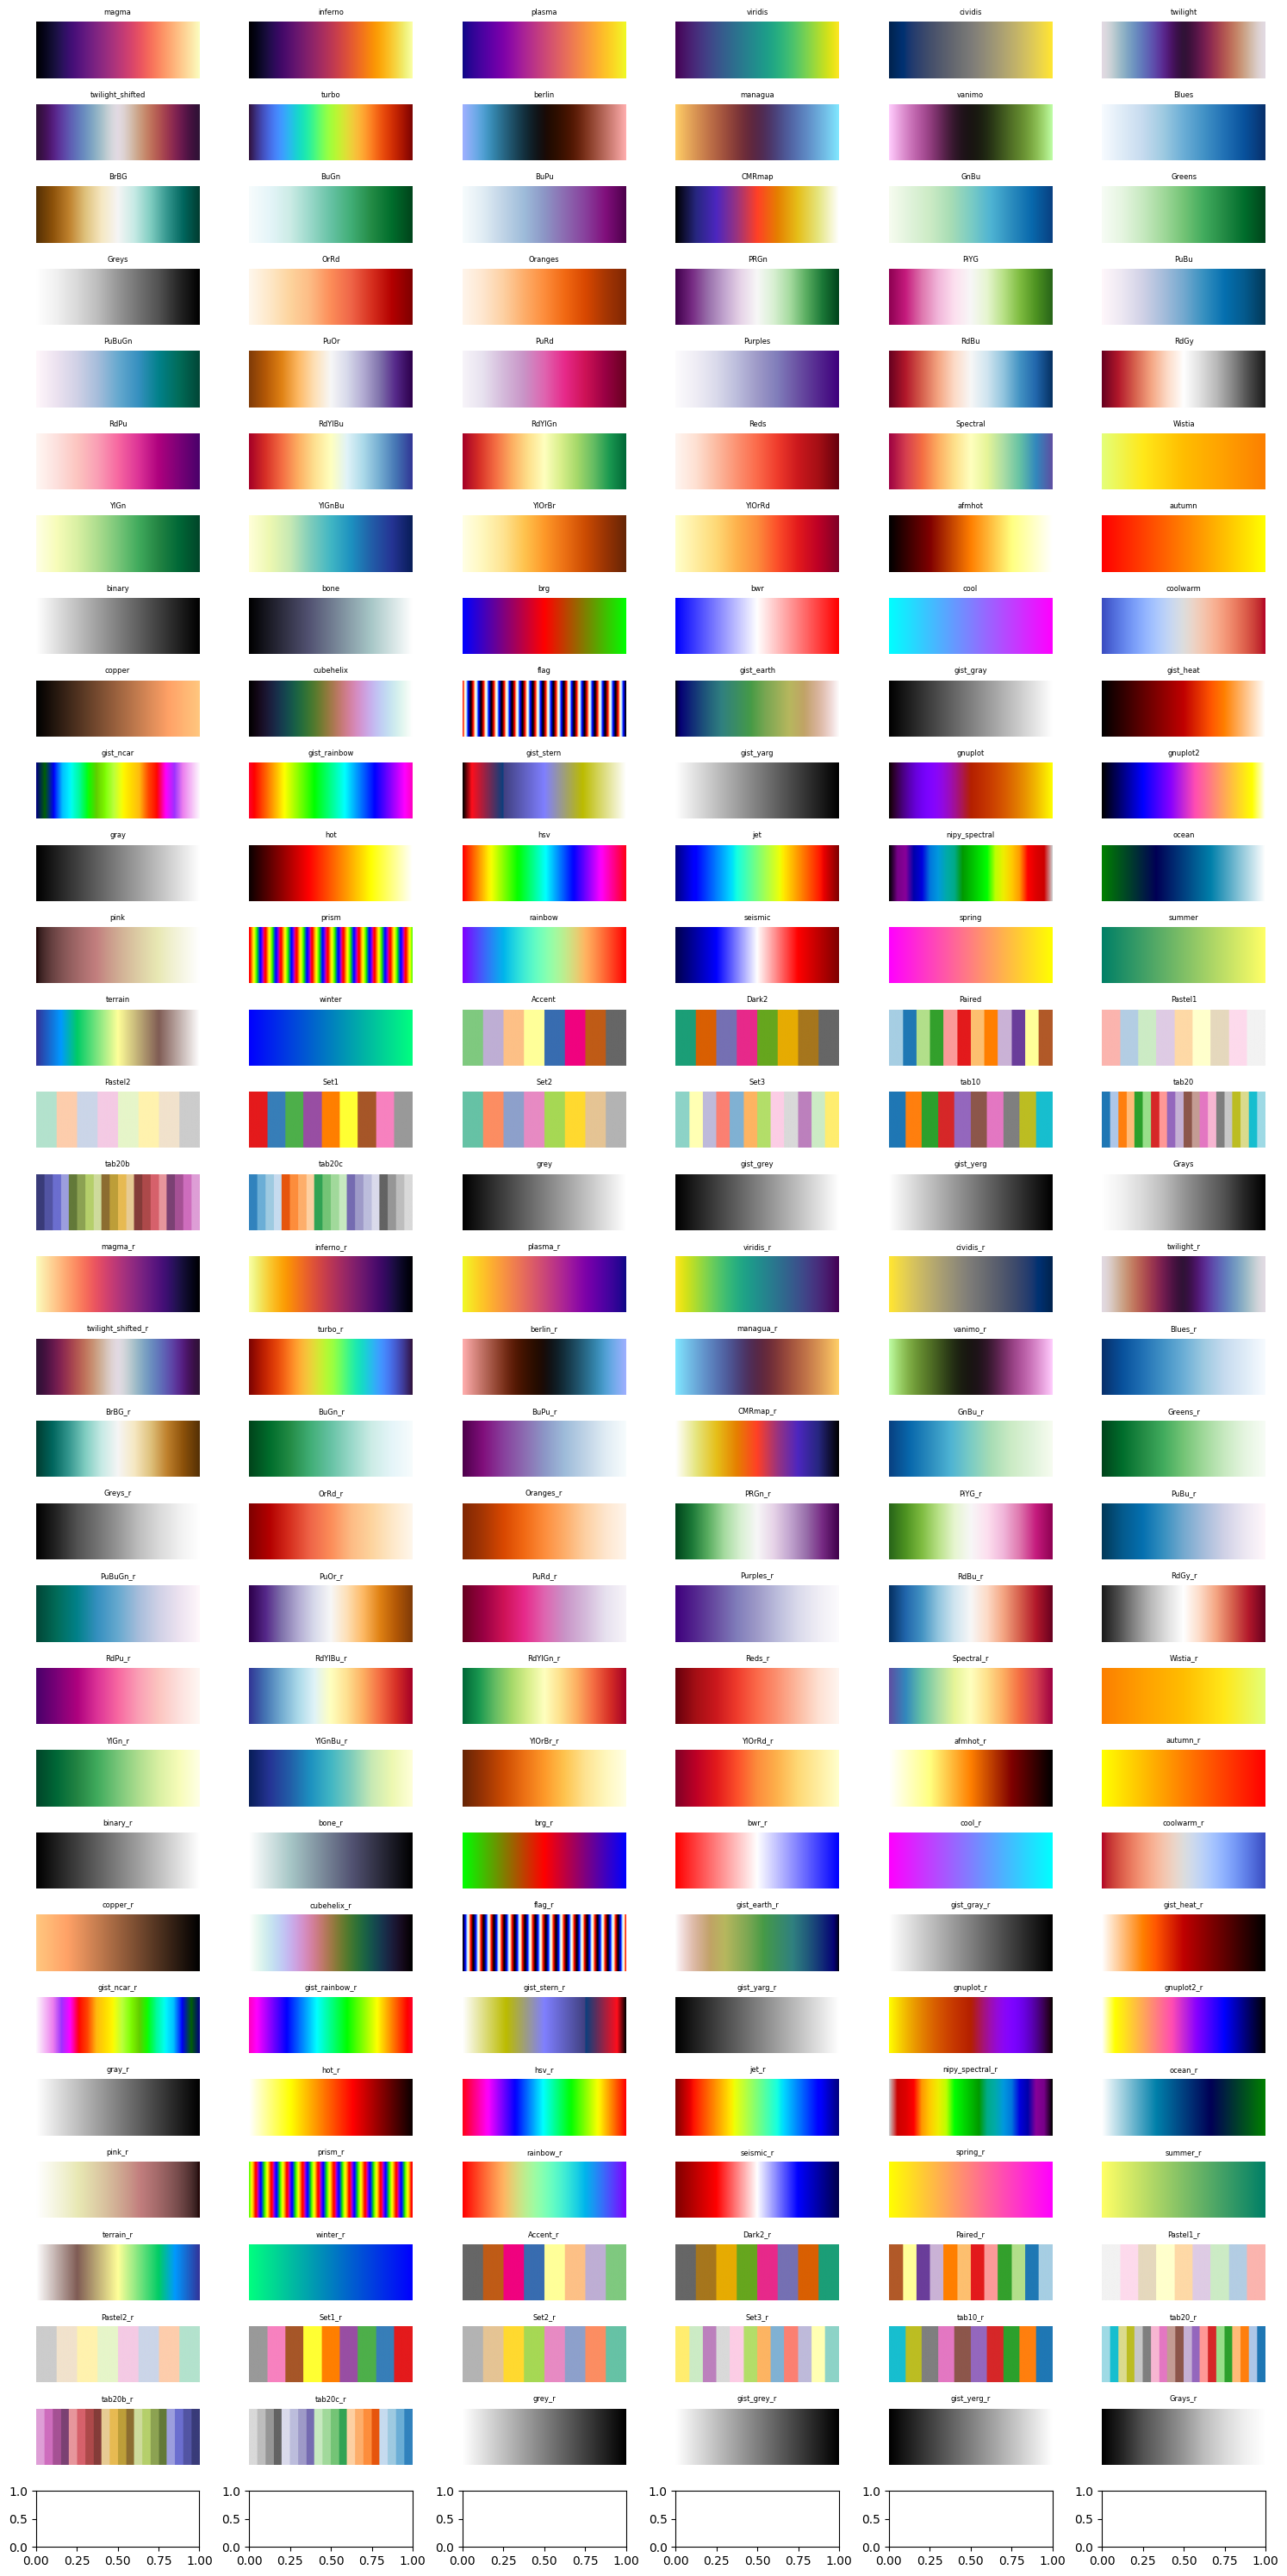

In [51]:
#To know which color palettes are available for the matrix
colormaps = plt.colormaps()
gradient = np.linspace(0, 1, 256).reshape(1, -1)

fig, axes = plt.subplots(len(colormaps)//6 + 1, 6, figsize=(15, len(colormaps)//6))
axes = axes.flatten()

for ax, cmap in zip(axes, colormaps):
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_title(cmap, fontsize=6)
    ax.axis('off')

plt.tight_layout()
plt.show()

             MOs1-R  MOs2/3-R    MOs5-R   MOs6a-R   MOs6b-R
180073473  0.000090  0.000047  0.000031  0.000031  0.000014
146858006  0.014414  0.006607  0.001641  0.005468  0.004344
112881858  0.000924  0.001834  0.000727  0.000821  0.001958
158314278  0.036583  0.014252  0.004428  0.006435  0.003185
116903230  0.000158  0.000371  0.000121  0.000235  0.000025
120491896  0.000708  0.000334  0.000157  0.000830  0.000681
100149109  0.007080  0.003640  0.000414  0.000643  0.000106
139519496  0.003501  0.001120  0.000167  0.000204  0.000071
115958825  0.031651  0.022284  0.008170  0.013016  0.004602


[Text(0, 0.5, '180073473'),
 Text(0, 1.5, '146858006'),
 Text(0, 2.5, '112881858'),
 Text(0, 3.5, '158314278'),
 Text(0, 4.5, '116903230'),
 Text(0, 5.5, '120491896'),
 Text(0, 6.5, '100149109'),
 Text(0, 7.5, '139519496'),
 Text(0, 8.5, '115958825')]

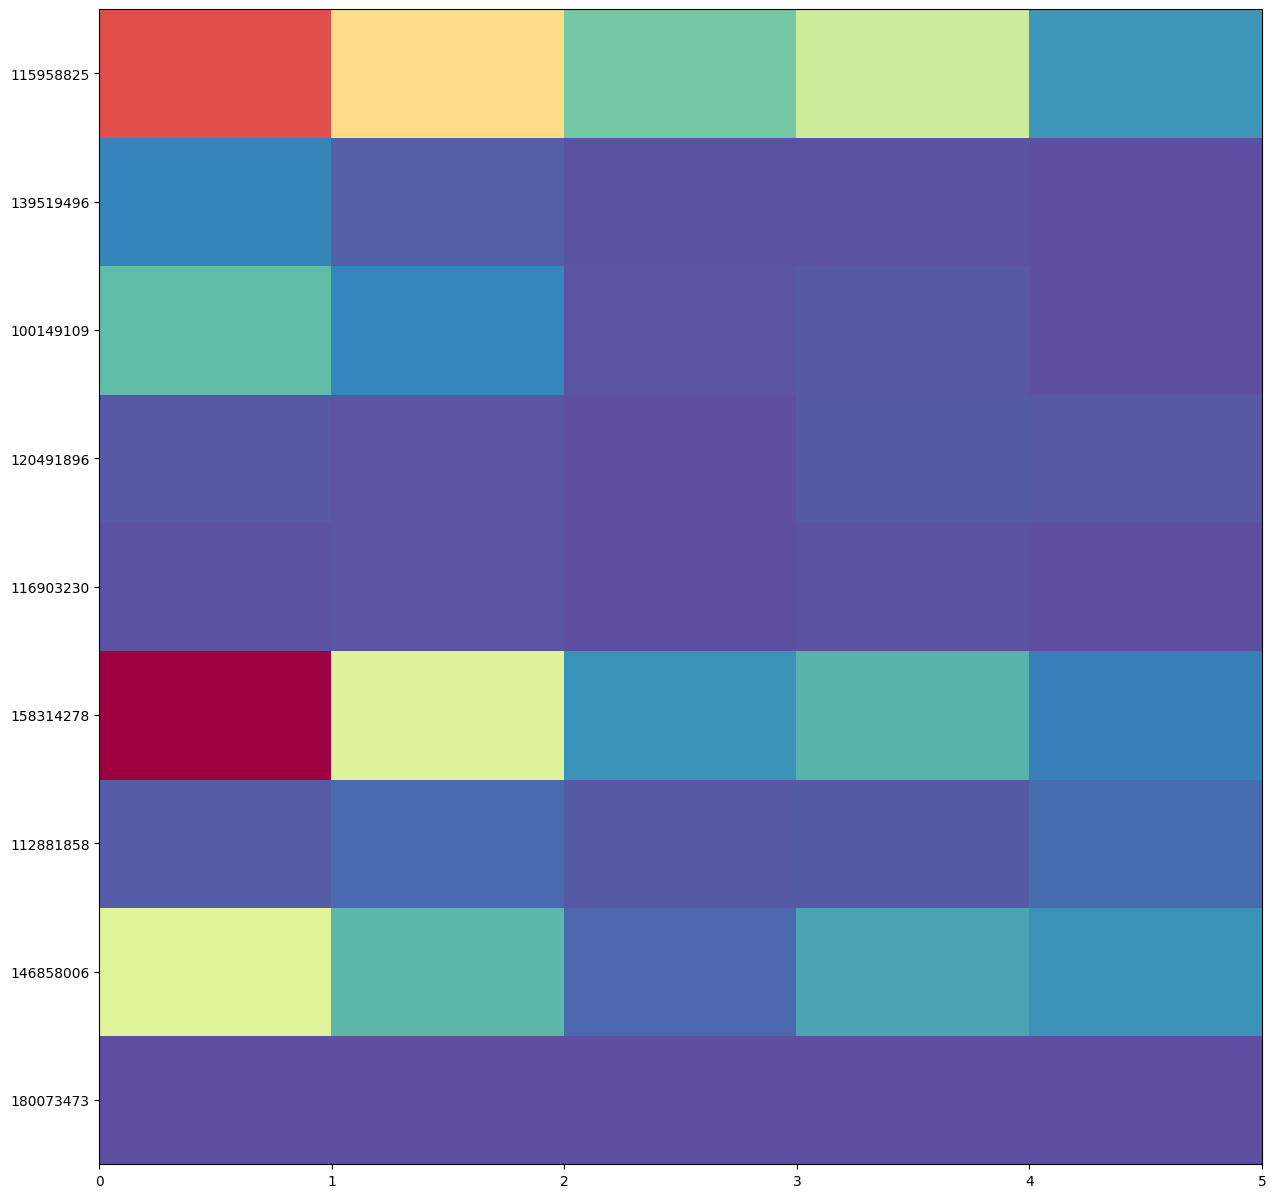

In [16]:
# Convert matrix to a NumPy array
matrix = np.array(matrix)

# Visualize projection density values
df_matrix = pd.DataFrame(matrix, index=row_labels, columns=column_labels)
print(df_matrix)

# Identify rows where all values are zero
non_zero_row_indices = np.any(matrix != 0, axis=1) 

# Filter rows and labels
filtered_matrix = matrix[non_zero_row_indices, :]
filtered_row_labels = [row_labels[i] for i in range(len(row_labels)) if non_zero_row_indices[i]]

# Update the heatmap with the filtered data
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = ax.pcolor(filtered_matrix, cmap=plt.cm.Spectral_r)

# Update y-tick labels
ax.set_yticks(np.arange(filtered_matrix.shape[0]) + 0.5, minor=False)
ax.set_yticklabels(filtered_row_labels, minor=False)

In [17]:
#Projection matrix but with projection volume data
pm_volume = mcc.get_projection_matrix(experiment_ids = visp_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_volume') 

row_labels = pm_volume['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm_volume['columns'] ] 
matrix = pm_volume['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.Spectral_r)

# Add a colorbar to the plot
colorbar = plt.colorbar(heatmap, ax=ax)
colorbar.set_label('Projection Volume (Volume of projecting voxels in mm^3)', fontsize=12)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

NameError: name 'visp_experiment_ids' is not defined

# Manipulating Grid Data

The MouseConnectivityCache class also helps you download and open every experiment's projection grid data volume. By default it will download 25um volumes, but you could also download data at other resolutions if you prefer (10um, 50um, 100um).

This demonstrates how you can load the projection density for a particular experiment. It also shows how to download the template volume to which all grid data is registered. Voxels in that template have been structurally annotated by neuroanatomists and the resulting labels stored in a separate annotation volume image.

In [19]:
# injection into AUD as example
experiment_id = 146858006

In [20]:
# projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(experiment_id)

# injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

# injection fraction: number of pixels in injection site / voxel volume
inf, inf_info = mcc.get_injection_fraction(experiment_id)

# data mask:
# binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

# in addition to the annotation volume, you can get binary masks for individual structures
# in this case, we'll get one for the MOs
cortex_mask, cm_info = mcc.get_structure_mask(993)

print(pd_info)
print(pd.shape, template.shape, annot.shape)

2025-07-31 10:13:31,601 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/146858006?image=injection_density&resolution=25
2025-07-31 10:13:33,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/146858006?image=injection_fraction&resolution=25
2025-07-31 10:13:36,221 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/146858006?image=data_mask&resolution=25
2025-07-31 10:13:39,236 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/annotation_25.nrrd


OrderedDict([('type', 'double'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([528, 320, 456])), ('space directions', array([[25.,  0.,  0.],
       [ 0., 25.,  0.],
       [ 0.,  0., 25.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])
(528, 320, 456) (528, 320, 456) (528, 320, 456)


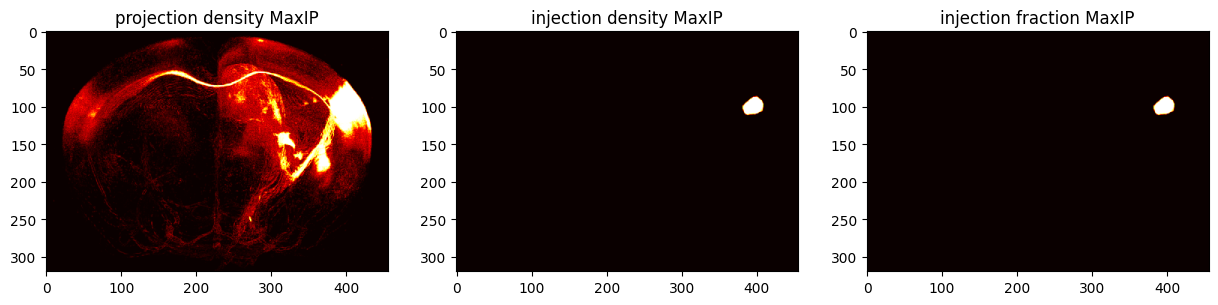

In [17]:
# compute the maximum intensity projection (along the anterior-posterior axis) of the projection data
pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)
inf_mip = inf.max(axis=0)

# show that slice of all volumes side-by-side
f, pr_axes = plt.subplots(1, 3, figsize=(15, 6))

pr_axes[0].imshow(pd_mip, cmap='hot', aspect='equal')
pr_axes[0].set_title("projection density MaxIP")

pr_axes[1].imshow(ind_mip, cmap='hot', aspect='equal')
pr_axes[1].set_title("injection density MaxIP")

pr_axes[2].imshow(inf_mip, cmap='hot', aspect='equal')
pr_axes[2].set_title("injection fraction MaxIP")

plt.show()

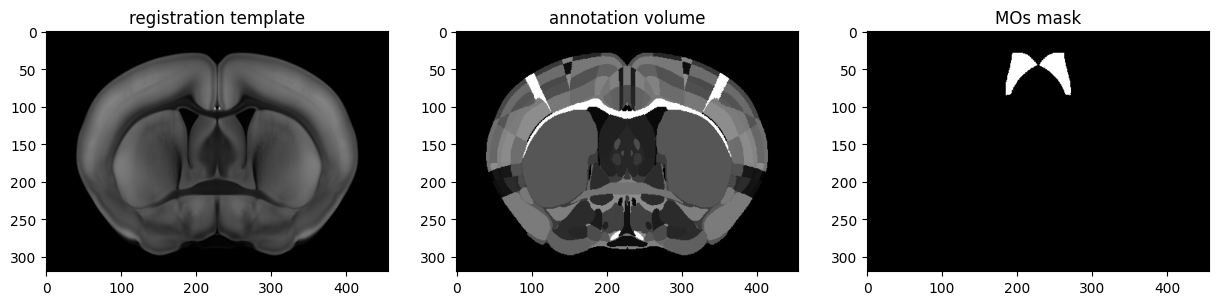

In [18]:
# Look at a slice from the average template and annotation volumes

# pick a slice to show
slice_idx = 210

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("registration template")

ccf_axes[1].imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
ccf_axes[1].set_title("annotation volume")

ccf_axes[2].imshow(cortex_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1)
ccf_axes[2].set_title("MOs mask")

plt.show()

On occasion the TissueCyte microscope fails to acquire a tile. In this case the data from that tile should not be used for analysis. The data mask associated with each experiment can be used to determine which portions of the grid data came from correctly acquired tiles.

In this experiment, a missed tile can be seen in the data mask as a dark warped square. The values in the mask exist within [0, 1], describing the fraction of each voxel that was correctly acquired

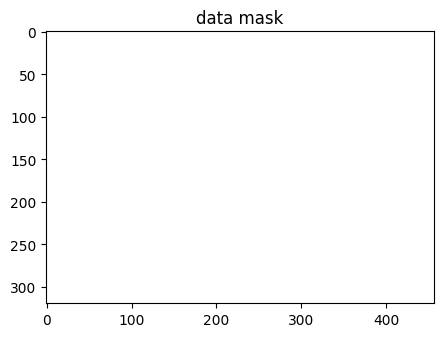

In [14]:
f, data_mask_axis = plt.subplots(figsize=(5, 6))

data_mask_axis.imshow(dm[81, :, :], cmap='hot', aspect='equal', vmin=0, vmax=1)
data_mask_axis.set_title('data mask')

plt.show()

# Working in 3D
Allen Institute has generated an average template volume from 1675 mouse brain image stacks and registering each connectivity datasets to this average template. This allows us to work in a shared 3d space, which we call the Common Coordinate Framework (CCF).
You can view the average template volume using your MouseConnectivityCache:

(528, 320, 456)


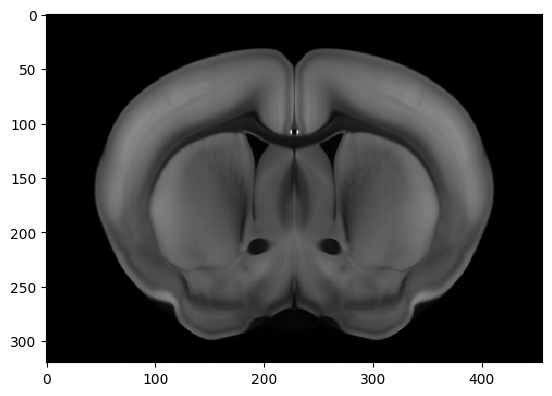

In [21]:
# load up the average template
template, header = mcc.get_template_volume()

# recall that this cache is at 25 micron isometric resolution
plt.imshow(template[200, :, :], interpolation='none', cmap=plt.cm.gray)

# how big?
print(template.shape)

The template is oriented:

anterior -> posterior

superior -> inferior

left -> right

This means that to obtain a sagittal view, we must slice along axis 2, and along axis 1 for a horizontal section (0=coronal, 1=horizontal, 2=sagittal):

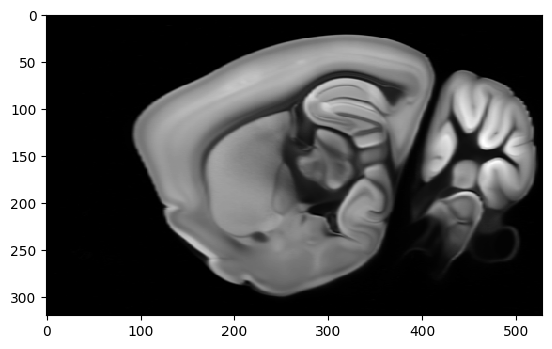

In [16]:
#Sagittal view
plt.imshow(template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

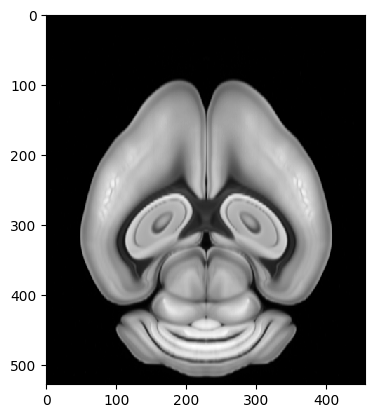

In [17]:
#Horizontal/longitudinal view
plt.imshow(template[:, 75, :], interpolation='none', cmap=plt.cm.gray)

# The annotation volume

Each (brain) voxel in the CCF is associated with a structure in the structure tree. This mapping is recorded in the annotation volume, which occupies the same space as the average template. The value of each voxel in the annotation volume is the id of the most specific structure occupying that point in space.

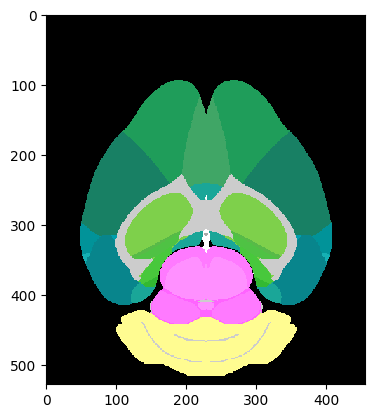

In [38]:
# you can obtain a reference space object from your mouse connectivity cache
# this object handles tasks that require both a structure tree and an annotation volume
reference_space =  mcc.get_reference_space()

# One such task is to apply our predefined structure colors to 
# a slice from the annotation volume
slice_image = reference_space.get_slice_image(1, 1875) # this method wants an axis and a position in microns
plt.imshow(slice_image, interpolation='none')

In [19]:
import pandas as pd

# you can load up the raw annotation using your MouseConnectivityCache
annotation, _ = mcc.get_annotation_volume()

#I want to find MOs (id=993)

np.where(annotation == 993) #only this would not show up anything, annotation only labels finest structure division at each voxel
MOs_children = structure_tree.children([993])[0]

pd.DataFrame(MOs_children)


,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,MOs1,1,25,656,"Secondary motor area, layer 1","[997, 8, 567, 688, 695, 315, 500, 993, 656]","[667481440, 184527634, 12, 691663206]","[31, 157, 90]"
1,MOs2/3,1,26,962,"Secondary motor area, layer 2/3","[997, 8, 567, 688, 695, 315, 500, 993, 962]","[667481441, 184527634, 12, 691663206]","[31, 157, 90]"
2,MOs5,1,27,767,"Secondary motor area, layer 5","[997, 8, 567, 688, 695, 315, 500, 993, 767]","[184527634, 12, 667481446, 691663206]","[31, 157, 90]"
3,MOs6a,1,28,1021,"Secondary motor area, layer 6a","[997, 8, 567, 688, 695, 315, 500, 993, 1021]","[667481449, 184527634, 12, 691663206]","[31, 157, 90]"
4,MOs6b,1,29,1085,"Secondary motor area, layer 6b","[997, 8, 567, 688, 695, 315, 500, 993, 1085]","[184527634, 12, 667481450, 691663206]","[31, 157, 90]"


In [20]:
# VISp, like other cortical structures, is subdivided into layers. 
# Voxels are directly assigned to the layer structures instead of to MOs
np.where(annotation==962) # 962 <==> MOs layer 2/3

(array([ 82,  82,  82, ..., 246, 246, 246], dtype=int64),
 array([95, 95, 95, ..., 31, 31, 31], dtype=int64),
 array([181, 182, 273, ..., 249, 250, 251], dtype=int64))

A couple of caveats regarding the annotation:

It is possible for a structure and its substructures to all be directly annotated. An example would be hypothalamus, which has nuclei labeled where and only where they are distinctly identifiable.

Not all structures in the structure tree are annotated or have annotated substructures.

In [ ]:
# Structure Mask
The annotation volume and structure tree contain a lot of information in a compact form. It can be simpler to work with more explicit representations of individual structures. We often use binary indicator masks for specific structures. These are:

volumes in the common coordinate framework

1 where the annotation is labeled with a structure or its descendants, otherwise 0

# view a structure mask for VISp
aud_mask, _ = mcc.get_structure_mask(247)
plt.imshow(aud_mask[:, :, 50].T, interpolation='none', cmap=plt.cm.gray)
plt.imshow(template[:, :, 50].T, interpolation='none', cmap=plt.cm.gray, alpha=0.4)

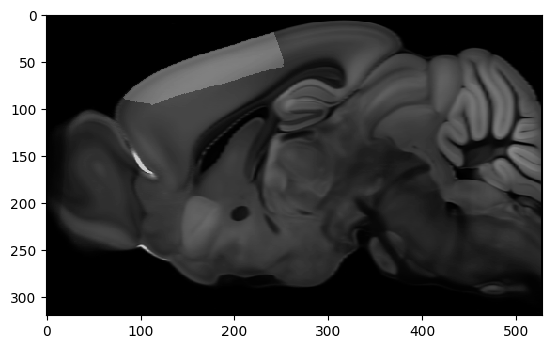

In [22]:
# view a structure mask for MOs
MOs_mask, _ = mcc.get_structure_mask(993)
plt.imshow(MOs_mask[:, :, 200].T, interpolation='none', cmap=plt.cm.gray)
plt.imshow(template[:, :, 200].T, interpolation='none', cmap=plt.cm.gray, alpha=0.8)

In [23]:
# we can now easily locate AUD/MOs-labeled voxels in space:
aud_voxel_coord = np.where(aud_mask)

MOs_voxel_coord = np.where(MOs_mask)

print(aud_voxel_coord)
print(MOs_voxel_coord)

(array([276, 276, 276, ..., 354, 354, 354], dtype=int64), array([109, 109, 110, ..., 123, 123, 123], dtype=int64), array([ 35, 421,  34, ...,  28, 427, 428], dtype=int64))
(array([ 77,  77,  77, ..., 258, 258, 258], dtype=int64), array([ 94, 109, 110, ...,  58,  58,  58], dtype=int64), array([278, 299, 156, ..., 261, 262, 263], dtype=int64))


In [24]:
#We can use the coordinates to extrapolate the mask of the roi

visp_template = template.copy()

# we use 0 here for the masked value because pyplot.imshow doesn't play nice with nan.
# This is not necessarily the right choice for your application!
visp_template[visp_mask == 0] = 0
plt.imshow(visp_template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

NameError: name 'visp_mask' is not defined

In [ ]:
MOs_template = template.copy()
MOs_template[MOs_mask == 0] = 0
plt.imshow(MOs_template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

In [ ]:

# We can now ask questions about the template while restricting our inquiry to VISp
# for instance, to find the mean voxelwise template intensity within visp:
visp_template.sum() / np.count_nonzero(visp_mask)
visp_template[visp_mask == 0] = 0
plt.imshow(visp_template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

In [ ]:
#Use get_median_template_intensity function to compare the median intensity in white and gray matter.

# find the appropriate ids
structure_tree.get_structures_by_name(['fiber tracts', 'Basic cell groups and regions'])

In [ ]:
#gm = get_median_template_intensity(mcc, [8])
#wm = get_median_template_intensity(mcc, [1009])

#print('gray: ' + str(gm))
#print('white: ' + str(wm))

# Gridded projection data
Since each connectivity experiment is registered to the CCF, we can load connectivity data in the same way as we do the average template or annotation volume.

Here we will load an experiment's projection density volume. These data:

are floats in [0, 1]

represent the fraction of each voxel that is occupied by signal (as detected in the segmentation stage)

are independent of the injection site (so it makes sense to discuss "projection in the injection site")

In [22]:
prdens, _ = mcc.get_projection_density(115958825)

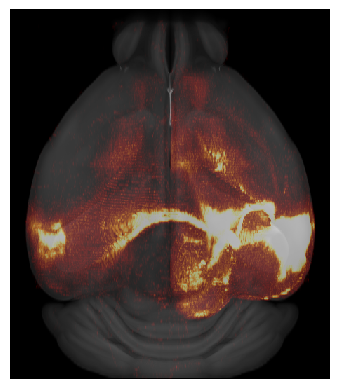

In [23]:
# make a max projection along the anterior-posterior axis for visualization
axis_proj(prdens, template, 1)

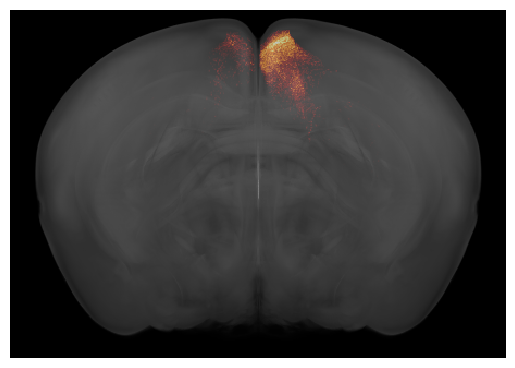

In [24]:
# now filter the signal to MOs
MOs_mask, _ = mcc.get_structure_mask(993)

prdens_MOs = prdens.copy()
prdens_MOs[MOs_mask == 0] = 0
axis_proj(prdens_MOs, template, 0) #coronal

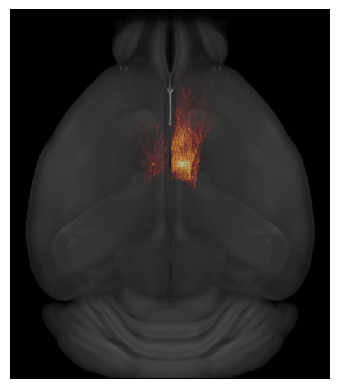

In [25]:
axis_proj(prdens_MOs, template, 1) #longitudinal

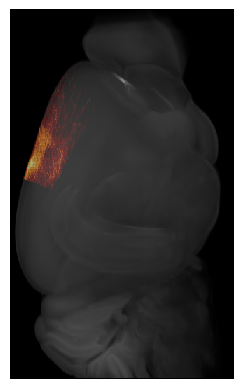

In [26]:
axis_proj(prdens_MOs, template, 2) #sagittal

In [27]:
# Another useful data volume is the injection fraction. This shows the fraction of each voxel that lies within
# this experiment's manually annotated injection site
ijfr, _ = mcc.get_injection_fraction(307137980)

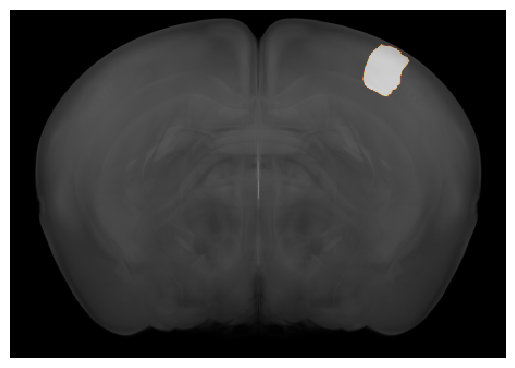

In [28]:
axis_proj(ijfr, template, 0)

In [29]:
print('MOs', fraction_of_structure(mcc, 993, 307137980))
print('VISp', fraction_of_structure(mcc, 385, 307137980))

MOs 0.0024685137676762024
VISp 0.3170128327372668


In [30]:
#Compute Average Projection Density from multiple experiments
# List of experiment IDs
experiment_ids_aud = [180073473, 146858006, 112881858, 158314278, 116903230, 120491896, 100149109, 139519496, 115958825]  # Experiment IDs
#experiment_ids_visp =[180296424, 114008926, 309004492, 309372716, 307558646, 113887162, 
#                      307743253, 307137980, 309113907, 307321674, 307297141, 307593747, 
#                      307296433, 127138787, 307320960, 307557934, 113887868, 309003780, 
#                      126862385, 100141219, 304565427, 272782668, 304586645, 100147853, 
#                      638314843, 174361040, 277714322, 277616630, 277713580, 304564721, 
#                      277712166, 304585910, 304762965]
experiment_ids_vis = [180296424, 100141796, 114008926, 127089669, 309004492, 126861679, 309372716, 307558646,
                      113887162, 100141599, 307743253, 307137980, 307295727, 309113907, 307321674, 120437703,
                      307297141, 307593747, 114250546, 307296433, 127138787, 307320960, 116903968, 100148503,
                      112373830, 307557934, 113887868, 146858755, 309003780, 146077302, 126862385, 100141219,
                      157062358, 304565427, 272782668, 304586645, 100147853, 638314843, 174361040, 277714322,
                      277616630, 277713580, 304564721, 277712166, 304585910, 272916202, 304762965]

# Initialize an array to accumulate projection densities
average_prdens_aud = None
average_prdens_vis = None

# Iterate through experiment IDs
for exp_id in experiment_ids_aud:
    prdens_aud, _ = mcc.get_projection_density(exp_id)  # Load projection density for the experiment
    if average_prdens_aud is None:
        # Initialize the accumulator with the shape of the first experiment's data
        average_prdens_aud = np.zeros_like(prdens_aud, dtype=np.float32)
    average_prdens_aud += prdens_aud

for exp_id in experiment_ids_vis:
    prdens_vis, _ = mcc.get_projection_density(exp_id)  # Load projection density for the experiment
    if average_prdens_vis is None:
        # Initialize the accumulator with the shape of the first experiment's data
        average_prdens_vis = np.zeros_like(prdens_vis, dtype=np.float32)
    average_prdens_vis += prdens_vis
    
# Compute the average
average_prdens_aud /= len(experiment_ids_aud)
average_prdens_vis /= len(experiment_ids_vis)

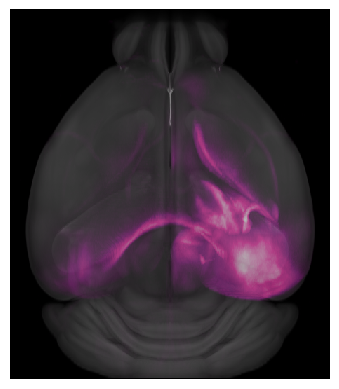

In [31]:
axis_proj_magenta(average_prdens_vis, template, 1)

output_filename = "projection_vis_wb_longitudinal_magenta.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

In [32]:
#Get masks from multiple frontal areas
MO_mask, _ = mcc.get_structure_mask(500)
ACA_mask, _ = mcc.get_structure_mask(31)
PL_mask, _ = mcc.get_structure_mask(972)
ILA_mask, _ = mcc.get_structure_mask(44)
ORB_mask, _ = mcc.get_structure_mask(714)
AI_mask, _ = mcc.get_structure_mask(95)

Combined_frontal_mask = MO_mask | ACA_mask | PL_mask | ILA_mask | ORB_mask | AI_mask

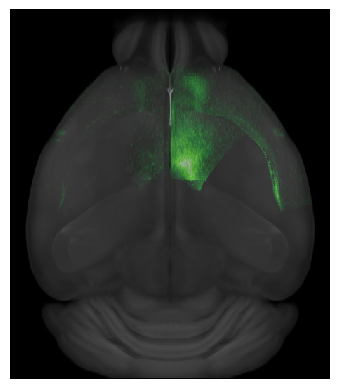

In [36]:
prdens_frontal = average_prdens_aud.copy()
prdens_frontal[Combined_frontal_mask == 0] = 0
axis_proj_green(prdens_frontal, template, 1) 

output_filename = "projection_aud_frontal_longitudinal_green.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

Projection density value Range in AUD matrix: 0.0 0.7673046
Projection density value Range in VIS matrix: 0.0 0.54269487
Active pixels in vis: 3125933
Active pixels in aud: 2867736


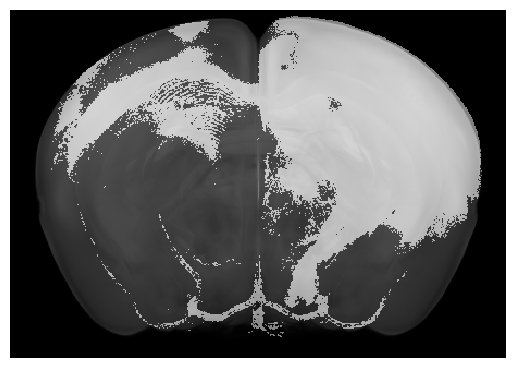

In [37]:
# Define threshold for active pixels
print("Projection density value Range in AUD matrix:", np.nanmin(average_prdens_aud), np.nanmax(average_prdens_aud))
print("Projection density value Range in VIS matrix:", np.nanmin(average_prdens_vis), np.nanmax(average_prdens_vis))
threshold = 0.015 #0.03

# Find active pixels in both datasets
active_aud = average_prdens_aud > threshold
active_vis = average_prdens_vis > threshold
print("Active pixels in vis:", np.count_nonzero(active_vis)) #check number of True pixels in vis matrix
print("Active pixels in aud:", np.count_nonzero(active_aud)) #check number of True pixels in aud matrix


# Find overlap of active pixels
overlap_active = active_aud & active_vis

# Visualize the averaged projection density
axis_proj(overlap_active, template, 0)  # Example: max projection

plt.show()

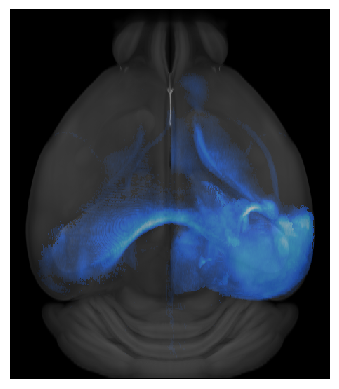

In [38]:
# Initialize combined projection density map
combined_prdens_sum = np.zeros_like(average_prdens_aud)

# Assign combined densities where overlap is active
combined_prdens_sum[overlap_active] = (
    average_prdens_aud[overlap_active] + average_prdens_vis[overlap_active]
)

axis_proj_blue(combined_prdens_sum, template, 1)  # Example: max projection


output_filename = "projection_vis_aud_wb_longitudinal.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

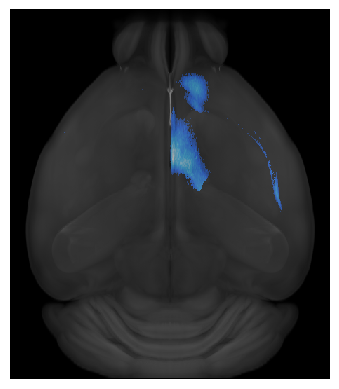

In [39]:
prdens_frontal = combined_prdens_sum.copy()
prdens_frontal[Combined_frontal_mask == 0] = 0
axis_proj_blue(prdens_frontal, template, 1) 

output_filename = "projection_vis_aud_mos_longitudinal_frontal.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

Selective index matrix

In [40]:
# Step 1: Sum overlapping active pixels
combined_prdens_sum = np.full_like(average_prdens_aud, np.nan, dtype=np.float32)
print("Sum Range in nan matrix:", np.min(combined_prdens_sum), np.max(combined_prdens_sum)) #Check they are all nan
combined_prdens_sum[overlap_active] = (
    average_prdens_aud[overlap_active] + average_prdens_vis[overlap_active]
)
print("Sum Range in summed matrix:", np.nanmin(combined_prdens_sum), np.nanmax(combined_prdens_sum)) #Check max and min value excluding nan
print("Active pixels in sum matrix:", np.count_nonzero(~np.isnan(combined_prdens_sum))) #check number active pixels in sum matrix, should be the same of the true pixels in overlap_active matrix
print("Size of sum matrix:", combined_prdens_sum.size) #check size sum matrix is not the same value of the number of active values


# Step 2: Apply a new threshold (1% of the max value of combined_prdens_sum)
sum_threshold = 0.01 * np.nanmax(combined_prdens_sum)
print("1% threshold value:", sum_threshold) #check this is not nan
selected_pixels = combined_prdens_sum > sum_threshold # Creates a 3D matrix of True or False
print("True pixels after 1% of max value thresholding:", np.count_nonzero(selected_pixels)) #check number of True pixels

# Step 3: Create a new 3D matrix with selectivity index
selectivity_index = np.full_like(average_prdens_aud, np.nan, dtype=np.float32)
print("Selectivity Range:", np.min(selectivity_index), np.max(selectivity_index)) #check they are all nan

# Identify valid pixels: where both active and above the new threshold
print("True pixels that are active overall:", np.count_nonzero(overlap_active)) #check number of True pixels
valid_pixels = overlap_active & selected_pixels

# Calculate the selectivity index only for valid pixels
A = average_prdens_aud[valid_pixels]
print("Aud Range:", np.min(A), np.max(A)) #check their values

B = average_prdens_vis[valid_pixels]
print("Vis Range:", np.min(B), np.max(B))#check their values

selectivity_index[valid_pixels] = (A - B) / (A + B)
print("Selectivity Index Range:", np.nanmin(selectivity_index), np.nanmax(selectivity_index)) #check they are not nan

Sum Range in nan matrix: nan nan
Sum Range in summed matrix: 0.030036345 0.93267214
Active pixels in sum matrix: 1636649
Size of sum matrix: 77045760
1% threshold value: 0.00932672142982483
True pixels after 1% of max value thresholding: 1636649
Selectivity Range: nan nan
True pixels that are active overall: 1636649
Aud Range: 0.015000019 0.7673046
Vis Range: 0.015000006 0.54269487
Selectivity Index Range: -0.94247293 0.9587798


In [41]:
#Some checks
print("Positive Pixels Count:", np.sum(selectivity_index > 0))
print("Negative Pixels Count:", np.sum(selectivity_index < 0))
print("NaN in selectivity_index:", np.isnan(selectivity_index).sum())
print("NaN in sum_matrix:", np.isnan(combined_prdens_sum).sum())
print("Selectivity index shape:", selectivity_index.shape)

Positive Pixels Count: 687008
Negative Pixels Count: 949641
NaN in selectivity_index: 75409111
NaN in sum_matrix: 75409111
Selectivity index shape: (528, 320, 456)


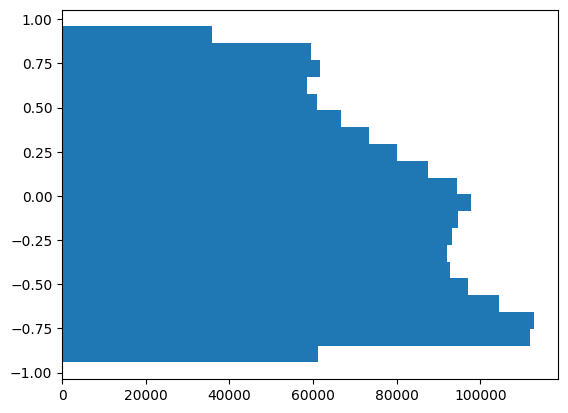

In [42]:
array_2d = selectivity_index.reshape(-1, selectivity_index.shape[-1])
array_1d = array_2d.flatten()
plt.hist(array_1d, bins = 20, orientation = 'horizontal')
plt.show()

NameError: name 'hue_cmap' is not defined

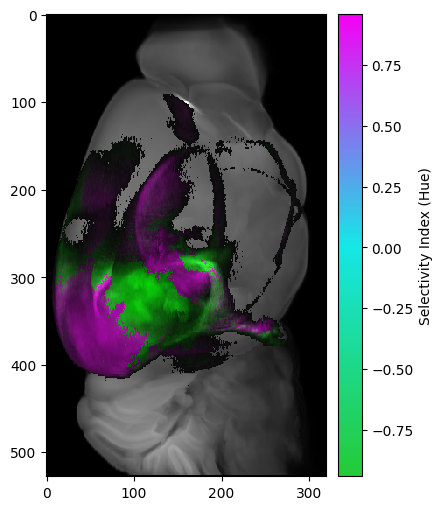

In [43]:
axis_proj_hsv_brightness(selectivity_index, combined_prdens_sum, template, 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3527559e-07..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.6321944e-07..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.261436e-10..1.21370066e+36].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.948203e-36..2.6340955e+35].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.770913e-16..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.948203e-36..42950197000.0].


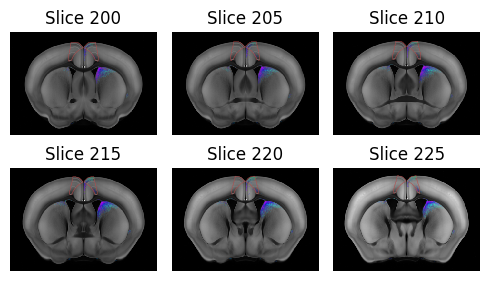

In [ ]:
# Show coronal slice 200
#From 20 to 150

# Settings
start_slice = 20
end_slice = 150
step = 5
axis = 1  # e.g., 0 = coronal, 1 = horizontal, 2 = sagittal

MOs_mask, _ = mcc.get_structure_mask(993)
MOs1_mask, _ = mcc.get_structure_mask(656)
MOs2_3_mask, _ = mcc.get_structure_mask(962)
MOs5_mask, _ = mcc.get_structure_mask(767)
MOs6a_mask, _ = mcc.get_structure_mask(1021)
MOs6b_mask, _ = mcc.get_structure_mask(1085)
combined_mask = (
    MOs1_mask |
    MOs2_3_mask |
    MOs5_mask |
    MOs6a_mask |
    MOs6b_mask
)

region_masks = {
    'MOs':     (MOs_mask, 'red'),
    'MOs1':    (MOs1_mask, 'grey'),
    'MOs2/3':  (MOs2_3_mask, 'grey'),
    'MOs5':    (MOs5_mask, 'grey'),
    'MOs6a':   (MOs6a_mask, 'grey'),
    'MOs6b':   (MOs6b_mask, 'grey')
}

fig, axes = plt.subplots(2, 3, figsize=(5,3))
axes = axes.flatten()

for i in range(6):
    slice_idx =200 + i * 5
    ax = axes[i]
    slice_hsv_overlay(
        selectivity_index,
        combined_prdens_sum,
        template,
        slice_index=slice_idx,
        axis=0,
        ax=ax,
        structure_masks=region_masks  # Pass the dict of region masks + colors
    )
    ax.set_title(f"Slice {slice_idx}")




plt.tight_layout()
plt.savefig("slices_with_MOs_overlay_Coronal_Focus.png", dpi=900)


In [ ]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

# Create directory to store frames
os.makedirs("frames", exist_ok=True)
filenames = []

# Generate frames with higher resolution (e.g., 6 inches × 4 inches at 200 DPI)
for i in range(263):
    slice_idx = 0 + i * 2
    fig, ax = plt.subplots(figsize=(10, 12), dpi=100)

    slice_hsv_overlay(
        selectivity_index,
        combined_prdens_sum,
        template,
        slice_index=slice_idx,
        axis=0,
        ax=ax,
        structure_masks=region_masks
    )
    
    ax.set_title(f"Slice {slice_idx}", fontsize=10)
    ax.axis("off")

    fname = f"frames/frame_{i:02d}.png"
    fig.savefig(fname, bbox_inches="tight")
    filenames.append(fname)
    plt.close(fig)

# Make the loop smooth by going forward and then backward
loop_filenames = filenames + filenames[::-1][1:-1]

# Create a looping GIF with 10 fps (0.1 sec per frame)
with imageio.get_writer("stack_slices_loop.gif", mode="I", duration=0.1, loop=0) as writer:
    for fname in loop_filenames:
        image = imageio.imread(fname)
        writer.append_data(image)

print("GIF saved as 'stack_slices_loop.gif' with higher resolution and smooth looping.")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.992583e-16..5.1671657e+35].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.006982349..5.1671657e+35].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.7161114e-16..5.1671657e+35].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.7161114e-16..6.08e-43].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.5616084e-16..0.00012302888].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.5616084e-16..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for i

GIF saved as 'stack_slices_loop.gif' with higher resolution and smooth looping.


In [ ]:
prdens_MOs_selectivity_index = selectivity_index.copy()
prdens_MOs_sum_matrix = combined_prdens_sum.copy()
prdens_MOs_selectivity_index[MOs_mask == 0] = 0
prdens_MOs_sum_matrix[MOs_mask == 0] = 0
axis_proj_hsv_brightness(prdens_MOs_selectivity_index, prdens_MOs_sum_matrix, template, 1)

In [ ]:
#Filter in MOs

prdens_MOs_average = overlap_active.copy()
prdens_MOs_average[MOs_mask == 0] = 0
axis_proj(prdens_MOs_average, template, 1) #coronal

In [ ]:
prdens_MOs_average = combined_prdens.copy()
prdens_MOs_average[MOs_mask == 0] = 0
axis_proj(prdens_MOs_average, template, 2) #coronal

In [ ]:
axis_proj(prdens_MOs_average, template, 1) #horizontal

In [ ]:
axis_proj(prdens_MOs_average, template, 2) #sagittal

In [ ]:
#For the injection site
# Initialize an array to accumulate projection densities
average_ijfr = None

# Iterate through experiment IDs
for exp_id in experiment_ids:
    ijfr, _ = mcc.get_injection_fraction(exp_id)  # Load projection density for the experiment
    if average_ijfr is None:
        # Initialize the accumulator with the shape of the first experiment's data
        average_ijfr = np.zeros_like(ijfr, dtype=np.float32)
    average_ijfr += ijfr

# Compute the average
average_ijfr /= len(experiment_ids)

In [ ]:
# Visualize the averaged injection fraction density
axis_proj(average_ijfr, template, 1)  # Example: max projection along anterior-posterior axis

# Correlation Analysis
I try to plot correlation matrices for MOs active pixels between different subregions in the VIs and AUD cortices

In [ ]:
# Get all experiments metadata
all_experiments = mcc.get_experiments(dataframe=True)

# Get metadata for the vis and aud experiments
aud_meta = all_experiments[all_experiments['id'].isin(experiment_ids_aud)]
vis_meta = all_experiments[all_experiments['id'].isin(experiment_ids_vis)]


In [ ]:
# Group experiments by injection structure
aud_groups = aud_meta.groupby('structure_abbrev')
vis_groups = vis_meta.groupby('structure_abbrev')

aud_groups

NameError: name 'aud_meta' is not defined

In [ ]:
# Create Sum Projection density maps per main injection structure
group_avg_maps = {}

#For auditory areas
for name, group in aud_groups:
    avg_map = None
    for exp_id in group['id']:
        prdens, _ = mcc.get_projection_density(exp_id)
        if avg_map is None:
            avg_map = np.zeros_like(prdens, dtype=np.float32)
        avg_map += prdens
    avg_map /= len(group)
    group_avg_maps[name] = avg_map

#For visual areas
for name, group in vis_groups:
    avg_map = None
    for exp_id in group['id']:
        prdens, _ = mcc.get_projection_density(exp_id)
        if avg_map is None:
            avg_map = np.zeros_like(prdens, dtype=np.float32)
        avg_map += prdens
    avg_map /= len(group)
    group_avg_maps[name] = avg_map

In [ ]:
## Troubleshooting

print(f"{name} | pr_map shape: {pr_map.shape}, mask shape: {MOs_mask.shape}")


AUDd | pr_map shape: (528, 320, 456), mask shape: (528, 320, 456)


In [ ]:
test_map = next(iter(group_avg_maps.values()))
print("Shape of test projection map:", test_map.shape)
print("Shape of MOs mask:", MOs_mask.shape)

# Should be the same
assert test_map.shape == MOs_mask.shape, "Mismatch in shape!"


Shape of test projection map: (528, 320, 456)
Shape of MOs mask: (528, 320, 456)


In [ ]:
# Extract values in MOs
values_in_mos = {}
for name, pr_map in group_avg_maps.items():
    values = pr_map[MOs_mask.astype(bool)]
    values_in_mos[name] = values[np.isfinite(values)]  # remove NaNs



In [ ]:
# Correlate groups
from scipy.stats import pearsonr

# Create a matrix: rows = MOs voxels, columns = injection sites
import pandas as pd

df = pd.DataFrame({k: pd.Series(v) for k, v in values_in_mos.items()})
df = df.dropna()  # remove rows with NaNs

correlation_matrix = df.corr(method='pearson')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from values_in_mos (fill shorter lists with NaNs)
correlation_df = pd.DataFrame(dict([
    (key, pd.Series(values)) for key, values in values_in_mos.items()
]))


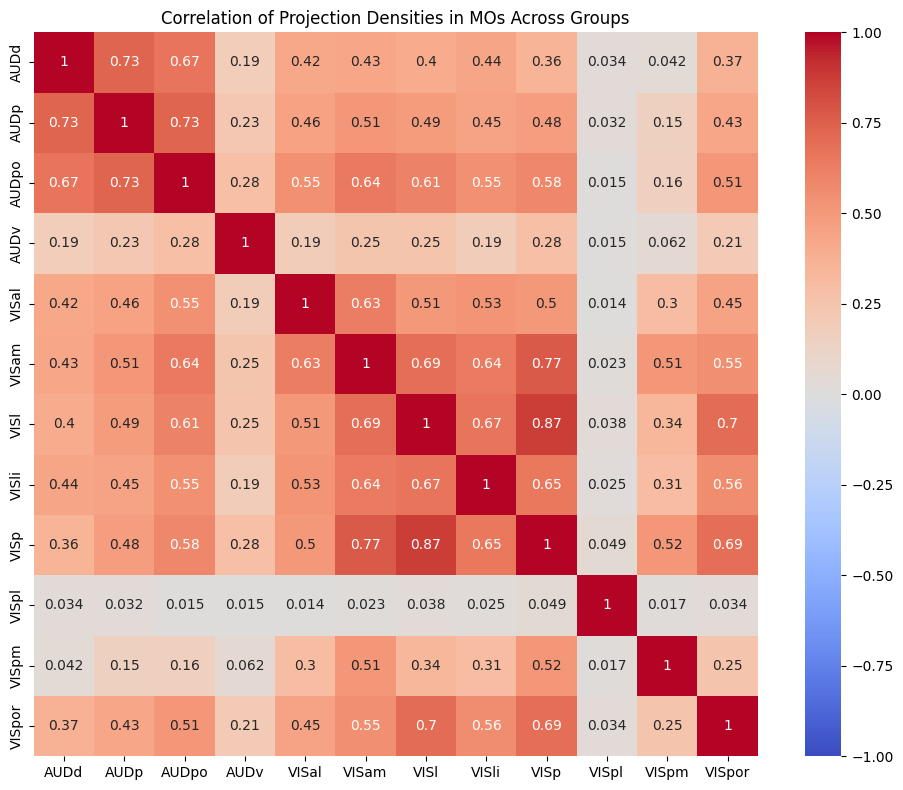

In [ ]:
# Compute correlation matrix
corr_matrix = correlation_df.corr()

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation of Projection Densities in MOs Across Groups")
plt.tight_layout()
plt.show()
